In [55]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import mceh_ver2c.utility as ut

In [56]:
g_data = pd.read_csv('data/wHSC-g.txt', delim_whitespace=True, comment='#', names=['wavelength', 'transmittance'])
r_data = pd.read_csv('data/wHSC-r2.txt', delim_whitespace=True, comment='#', names=['wavelength', 'transmittance'])
i_data = pd.read_csv('data/wHSC-i2.txt', delim_whitespace=True, comment='#', names=['wavelength', 'transmittance'])
z_data = pd.read_csv('data/wHSC-z.txt', delim_whitespace=True, comment='#', names=['wavelength', 'transmittance'])
y_data = pd.read_csv('data/wHSC-Y.txt', delim_whitespace=True, comment='#', names=['wavelength', 'transmittance'])

/tmp/ipykernel_2434415/3174837564.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  g_data = pd.read_csv('data/wHSC-g.txt', delim_whitespace=True, comment='#', names=['wavelength', 'transmittance'])
/tmp/ipykernel_2434415/3174837564.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  r_data = pd.read_csv('data/wHSC-r2.txt', delim_whitespace=True, comment='#', names=['wavelength', 'transmittance'])
/tmp/ipykernel_2434415/3174837564.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  i_data = pd.read_csv('data/wHSC-i2.txt', delim_whitespace=True, comment='#', names=['wavelength', 'transmittance'])
/tmp/ipykernel_2434415/3174837564.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv 

In [57]:
all_data = [g_data, r_data, i_data, z_data, y_data]
all_name = ['g', 'r', 'i', 'z', 'y']
wl, tm = 'wavelength', 'transmittance'

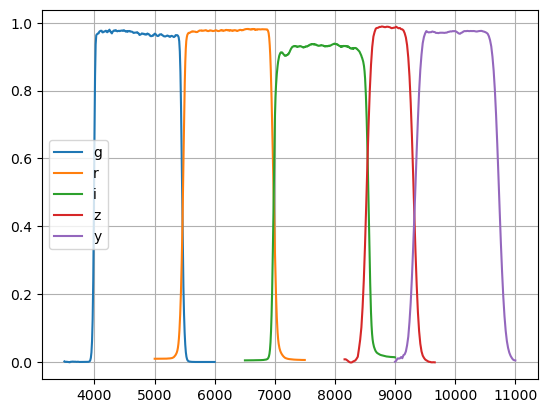

In [58]:
def plot_data():
    i = 0
    for data in all_data:
        plt.plot(data['wavelength'], data['transmittance'], label = all_name[i])
        i += 1
plot_data()
plt.legend()
plt.grid()

(0.408, 0.41)

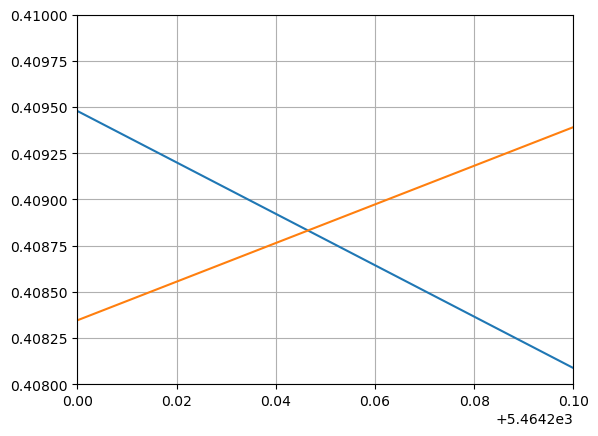

In [80]:
# g-r
plot_data()
plt.xlim(5464.2, 5464.3)
plt.grid()
plt.ylim(0.408, 0.41)
# 5464.25

(0.488, 0.495)

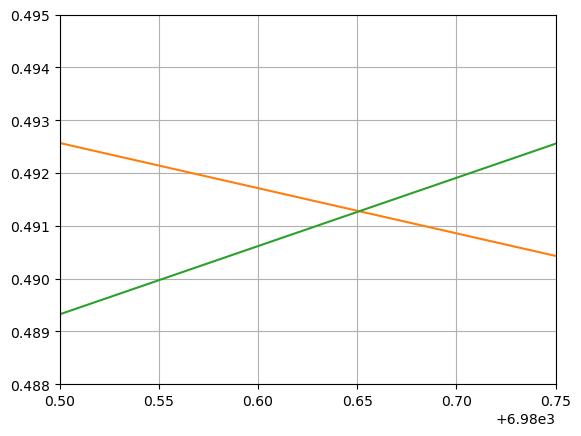

In [86]:
# r-i
plot_data()
plt.grid()
plt.xlim(6980.5, 6980.75)
plt.ylim(0.488, 0.495)
# 6980.65

(0.603, 0.608)

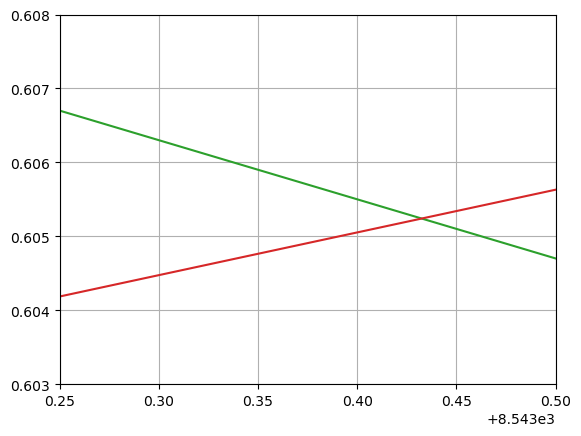

In [93]:
# i_z
plot_data()
plt.grid()
plt.xlim(8543.25, 8543.5)
plt.ylim(0.603, 0.608)
# 8543.43

(0.43085, 0.431)

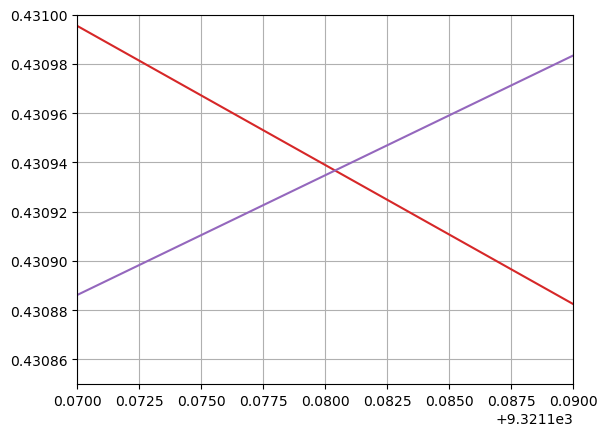

In [104]:
# z-y
plot_data()
plt.grid()
plt.xlim(9321.17, 9321.19)
plt.ylim(0.43085, 0.431)
# 9321.18

In [105]:
"""
The intersection of wavelengths are:
g-r: ~5464.25
r-i: ~6980.65
i-z: ~8543.43
z-y: ~9321.18

By seeing the data, I found the intersection.
g:  
 5460.0  0.4679
 5470.0  0.3288

r:
 5464.1  0.4073
 5468.3  0.4512

 6976.5  0.5268
 6980.8  0.4900

i:
 6976.5  0.4376
 6980.8  0.4932

 8541.7  0.6191
 8546.1  0.5839

z:
 8540.0  0.5854
 8560.0  0.7010

 9320.0  0.4376
 9340.0  0.3247

y:
 9320.0  0.4252
 9340.0  0.5224

"""

'\nThe intersection of wavelengths are:\ng-r: ~5464.25\nr-i: ~6980.65\ni-z: ~8543.43\nz-y: ~9321.18\n\nBy seeing the data, I found the intersection.\ng:  \n 5460.0  0.4679\n 5470.0  0.3288\n\nr:\n 5464.1  0.4073\n 5468.3  0.4512\n\n 6976.5  0.5268\n 6980.8  0.4900\n\ni:\n 6976.5  0.4376\n 6980.8  0.4932\n\n 8541.7  0.6191\n 8546.1  0.5839\n\nz:\n 8540.0  0.5854\n 8560.0  0.7010\n\n 9320.0  0.4376\n 9340.0  0.3247\n\ny:\n 9320.0  0.4252\n 9340.0  0.5224\n\n'

In [64]:
# Find the intersection x.
def interx(p1_1, p1_2, p2_1, p2_2):
    x1_1, y1_1 = p1_1
    x1_2, y1_2 = p1_2
    x2_1, y2_1 = p2_1
    x2_2, y2_2 = p2_2
    s1 = (y1_2 - y1_1) / (x1_2 - x1_1)
    s2 = (y2_2 - y2_1) / (x2_2 - x2_1)
    x = (y2_1 - y1_1 + s1 * x1_1 - s2 * x2_1) / (s1 - s2)
    return x

In [106]:
gr_g = [[5460.0, 0.4679], [5470.0, 0.3288]]
gr_r = [[5464.1, 0.4073], [5468.3, 0.4512]]
ri_r = [[6976.5, 0.5268], [6980.8, 0.4900]]
ri_i = [[6976.5, 0.4376], [6980.8, 0.4932]]
iz_i = [[8541.7, 0.6191], [8546.1, 0.5839]]
iz_z = [[8540.0, 0.5854], [8560.0, 0.7010]]
zy_z = [[9320.0, 0.4376], [9340.0, 0.3247]]
zy_y = [[9320.0, 0.4252], [9340.0, 0.5224]]

In [107]:
g_r = interx(gr_g[0], gr_g[1], gr_r[0], gr_r[1])
r_i = interx(ri_r[0], ri_r[1], ri_i[0], ri_i[1])
i_z = interx(iz_i[0], iz_i[1], iz_z[0], iz_z[1])
z_y = interx(zy_z[0], zy_z[1], zy_y[0], zy_y[1])
print(g_r, r_i, i_z, z_y)

5464.246496354645 6980.651082251083 8543.43251088534 9321.18039029034


In [108]:
result = [g_r, r_i, i_z, z_y]
ut.pickle_dump(result, 'data/grizy_bound.pickle')